In [1]:
import cv2 as cv
import os
from scipy.ndimage import rotate
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import cm
import random
import matplotlib.pyplot as plt
import random

In [2]:
def rotate_img(img):
    theta = random.randint(1, 360)
    return rotate(img, theta, reshape=False)

In [3]:
path = 'generated_ssm_2'
i = 1
rotated_images = []
for filename in os.listdir(path):
    img = cv.imread(os.path.join(path, filename.format(i)))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    theta = random.randint(1,360)
    rotated_images.append(rotate_img(img))

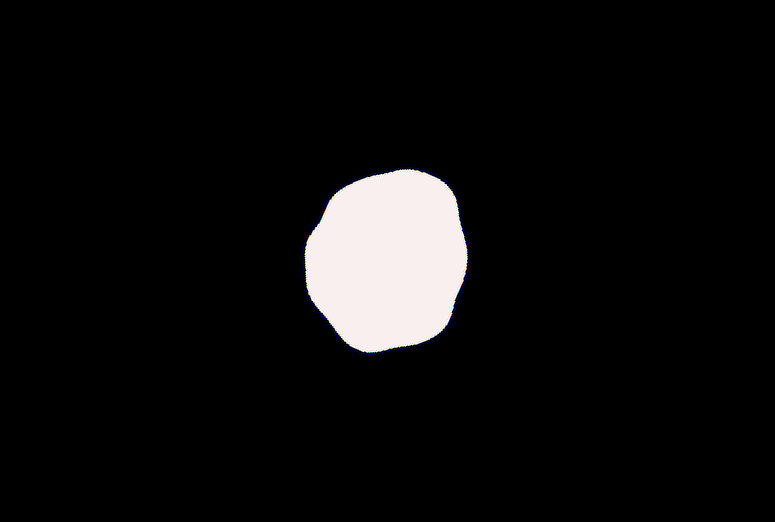

In [4]:
rotated_img = Image.fromarray(np.uint8(cm.gist_earth(rotated_images[3])*255))
rotated_img

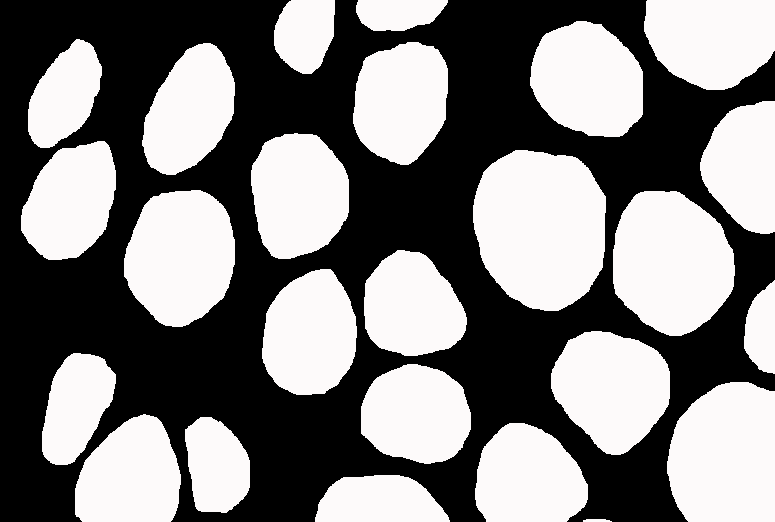

In [12]:
fname='cw/cw/test/masks/13.bmp'
img_from_dataset = Image.open(fname).convert('L')
img_from_dataset = np.asarray(img_from_dataset)
Image.fromarray(np.uint8(cm.gist_earth(img_from_dataset)*255))

In [13]:
gan_img_path = 'GAN256/Result_5000/i27.png'
gan_img = Image.open(gan_img_path).convert('L')
gan_img = np.asarray(gan_img)
gan_img.shape

(1536, 2048)

In [14]:
tiles = [np.array(gan_img[x:x+256, y:y+256]) for x in range(0, gan_img.shape[0], 256) for y in range(0, gan_img.shape[1], 256)]

In [15]:
for tile in tiles:
    tile[tile < 200] = 0
    tile[tile > 200] = 255

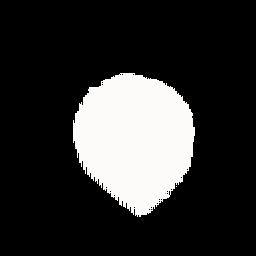

In [16]:
test_img = tiles[1]
Image.fromarray(np.uint8(cm.gist_earth(test_img)*255))

In [17]:
def smooth_from_gan(test_img):
    blur = cv.GaussianBlur(test_img, (0,0), sigmaX=3, sigmaY=3, borderType = cv.BORDER_DEFAULT)
    ret, thresh = cv.threshold(blur, 200, 255, cv.THRESH_BINARY)
    contours, hierarchy = cv.findContours(thresh, cv.RETR_CCOMP, cv.CHAIN_APPROX_NONE)
    img_array = []
    img = np.full(test_img.shape[:2], 0)
    max_con = 0
    max_i = -1
    for i in range(len(contours)):
        if len(contours[i]) > max_con:
            max_con = len(contours[i])
            max_i = i
    for i in contours[max_i]:
        img[i[0][1], i[0][0]] = 255
        img_array.append([i[0][1], i[0][0]])
    img3 = cv.fillPoly(img, pts =[contours[max_i]], color=255)
    return img3

In [18]:
final_images = []
for tile in tiles:
    final_images.append(rotate_img(smooth_from_gan(tile)))
    

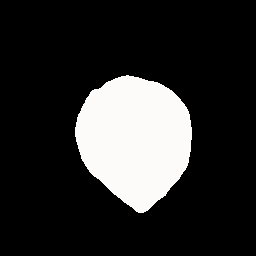

In [19]:
Image.fromarray(np.uint8(cm.gist_earth(smooth_from_gan(tiles[1]))*255))

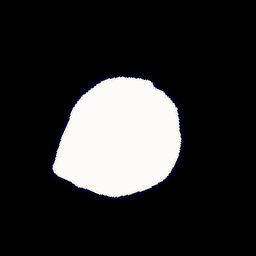

In [20]:
Image.fromarray(np.uint8(cm.gist_earth(final_images[1])*255))

In [21]:
masks_dir = 'tmp_for_overleaf'
if not os.path.exists(masks_dir):
    os.makedirs(masks_dir)
for i in range(len(final_images)):
    cv.imwrite(os.path.join(masks_dir, 'gan_img_{}.jpg'.format(i)), final_images[i])

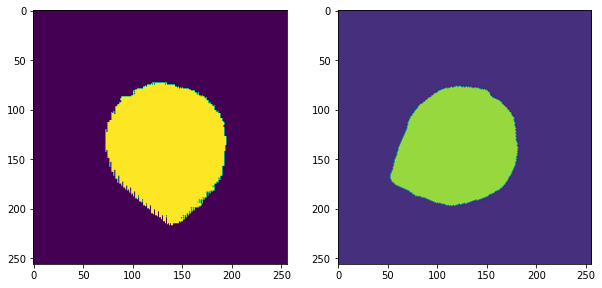

In [22]:
fig = plt.figure(figsize=(10, 7))
img = tiles[1]
fig.add_subplot(1, 2, 1)
plt.imshow(img)
img2 = final_images[1]
fig.add_subplot(1, 2, 2)
plt.imshow(img2)

plt.show()

In [23]:
# placing cells on blanc image

blank = np.zeros(img_from_dataset.shape)
blank.shape

(522, 775)

In [24]:
test = final_images[6]
pad_const_0 = img_from_dataset.shape[0]-256
pad_const_1 = img_from_dataset.shape[1]-256
test_padded = np.pad(test, ((0, pad_const_0), (0, pad_const_1)), 'minimum')
test_padded.shape

(522, 775)

In [25]:
test = final_images[6]
pad_const_0 = img_from_dataset.shape[0]-256
pad_const_1 = img_from_dataset.shape[1]-256
bias0 = random.randint(0, img_from_dataset.shape[0]-256)
bias1 = random.randint(0, img_from_dataset.shape[1]-256)
test_padded = np.pad(final_images[2], ((bias0, pad_const_0-bias0), (bias1, pad_const_1-bias1)), 'minimum')

In [26]:
test[100:200, 100:]

array([[255, 258, 251, ...,   0,   0,   0],
       [256, 254, 256, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

Added picture 0 to blank image.
Added picture 1 to blank image.
Added picture 2 to blank image.
Added picture 3 to blank image.
Added picture 4 to blank image.
Added picture 5 to blank image.
Added picture 6 to blank image.
Added picture 7 to blank image.
Added picture 8 to blank image.
Added picture 9 to blank image.
Added picture 23 to blank image.
Added picture 25 to blank image.
Added picture 29 to blank image.
Added picture 40 to blank image.


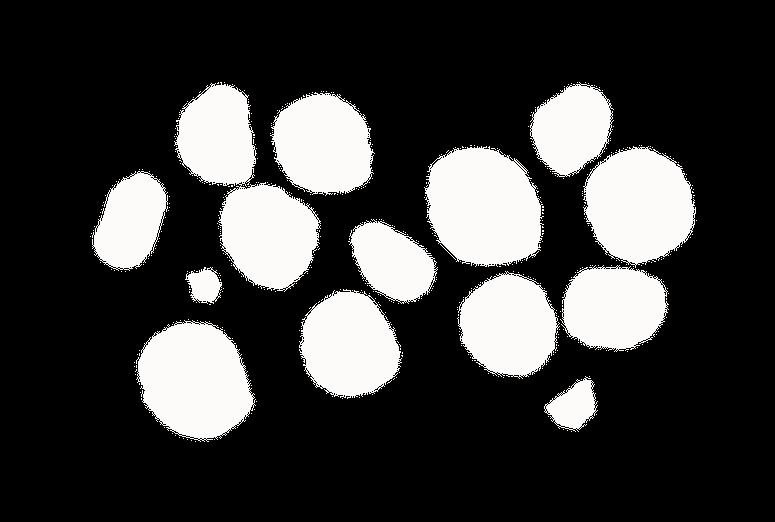

In [34]:
blank = np.zeros(img_from_dataset.shape)
final_images = []

for tile in tiles:
    final_images.append(rotate_img(smooth_from_gan(tile)))
    
random.shuffle(final_images)


for j in range(len(final_images)):
    c = 0
    while c < 20:
        bias0 = random.randint(0, img_from_dataset.shape[0]-256)
        bias1 = random.randint(0, img_from_dataset.shape[1]-256)
        padded = np.pad(final_images[j], ((bias0, pad_const_0-bias0), (bias1, pad_const_1-bias1)))
        if np.sum(blank*padded) == 0:
            blank += padded
            print("Added picture {} to blank image.".format(j))
            break
        c += 1
        
Image.fromarray(np.uint8(cm.gist_earth(blank)*255))

Added picture 0 to blank image.
Added picture 1 to blank image.
Added picture 2 to blank image.
Added picture 3 to blank image.
Added picture 4 to blank image.
Added picture 5 to blank image.
Added picture 6 to blank image.
Added picture 7 to blank image.
Added picture 9 to blank image.
Added picture 10 to blank image.
Added picture 12 to blank image.
Added picture 14 to blank image.
Added picture 26 to blank image.
Added picture 27 to blank image.
Added picture 45 to blank image.


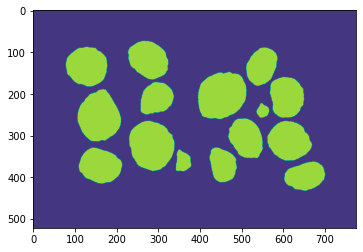

In [37]:
blank = np.zeros(img_from_dataset.shape)
final_images = []

for tile in tiles:
    final_images.append(rotate_img(smooth_from_gan(tile)))
    
random.shuffle(final_images)


for j in range(len(final_images)):
    c = 0
    while c < 40:
        bias0 = random.randint(0, img_from_dataset.shape[0]-256)
        bias1 = random.randint(0, img_from_dataset.shape[1]-256)
        padded = np.pad(final_images[j], ((bias0, pad_const_0-bias0), (bias1, pad_const_1-bias1)))
        plt.imshow(blank)
        if np.sum(blank*padded) == 0:
            blank = (padded + blank).astype(int)
            print("Added picture {} to blank image.".format(j))
            break
        c += 1
        
#Image.fromarray(np.uint8(cm.gist_earth((blank))*255))

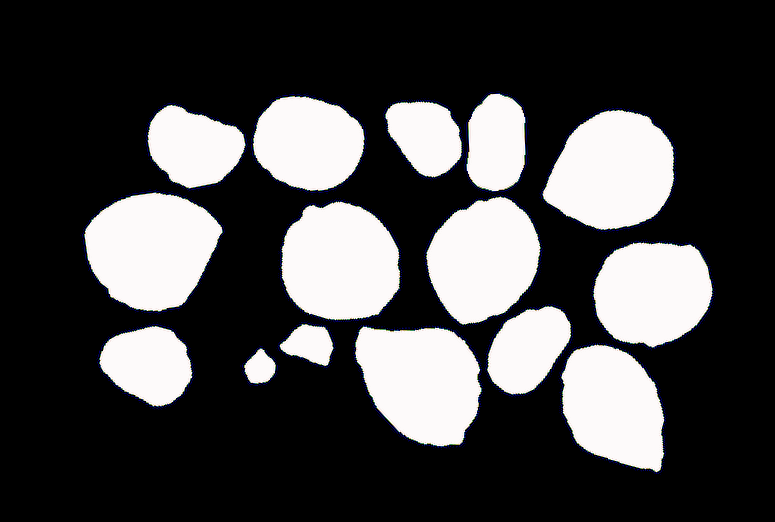

In [30]:
blank = np.zeros(img_from_dataset.shape)
final_images = []

for tile in tiles:
    final_images.append(rotate_img(smooth_from_gan(tile)))
    
random.shuffle(final_images)


for j in range(len(final_images)):
    c = 0
    while c < 60:
        bias0 = random.randint(0, img_from_dataset.shape[0]-256)
        bias1 = random.randint(0, img_from_dataset.shape[1]-256)
        padded = np.pad(final_images[j], ((bias0, pad_const_0-bias0), (bias1, pad_const_1-bias1)))
        if np.sum(blank*padded) == 0:
            blank = (padded + blank).astype(int)
            # print("Added picture {} to blank image.".format(j))
            break
        c += 1
        
Image.fromarray(np.uint8(cm.gist_earth((blank))*255))

In [31]:
path = "C:/Users/alsug/Downloads/img_119_fake_B.png"
path2 = "C:/Users/alsug/Downloads/img_115_fake_B.png"
img = cv.imread(path)
img2 = cv.imread(path2)
center = img.shape
w, h  = 100, 100
x = center[1]/2 - w/2
y = center[0]/2 - h/2
img = img[int(y):int(y+h), int(x):int(x+w)]
img2 = img2[int(y):int(y+h), int(x):int(x+w)]
cv.imwrite(os.path.join(masks_dir, 'pix2pix_img_{}.jpg'.format(1)), img)
cv.imwrite(os.path.join(masks_dir, 'pix2pix_img_{}.jpg'.format(2)), img2)

True

(522, 775)
(380, 640)


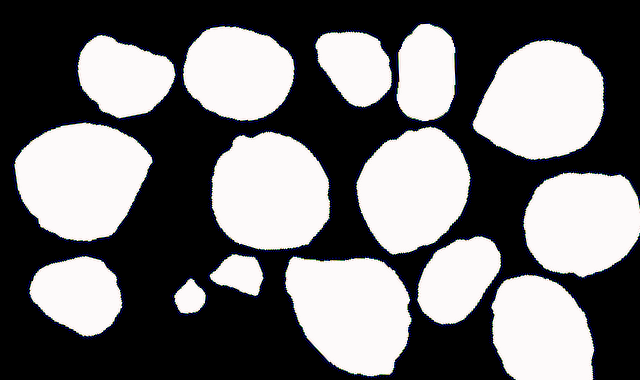

In [32]:
im = blank
print(im.shape)
im = im[70:450, 70:710]
print(im.shape)
Image.fromarray(np.uint8(cm.gist_earth((im))*255))